In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Load arrays 

In [3]:
Xp = np.array([[ 4, 2, 2, 3, 4, 6, 3, 8],
               [ 1, 4, 3, 6, 4, 2, 2, 3],
               [ 0, 1, 1, 0,-1, 0, 1, 0]])
Xn = np.array([[ 9, 6, 9, 8, 10],
               [10, 8, 5, 7,  8],
               [ 1, 0, 0, 1, -1]])
X = np.concatenate((Xp, Xn), axis=1)

n_p = Xp.shape[1]
n_n = Xn.shape[1]
n = X.shape[1]

# Calculate means

In [4]:
mu_p = Xp.mean(axis=1).reshape((3,1))
mu_n = Xn.mean(axis=1).reshape((3,1))
mu = X.mean(axis=1).reshape((3,1))

In [5]:
mu_p

array([[4.   ],
       [3.125],
       [0.25 ]])

In [6]:
mu_n

array([[8.4],
       [7.6],
       [0.2]])

# Calculate Covariances

In [7]:
Xp_centered = Xp - mu_p #centered matrix
Xn_centered = Xn - mu_n
X_centered = X - mu

In [8]:
Sp = Xp_centered @ Xp_centered.T
Sn = Xn_centered @ Xn_centered.T

In [9]:
Sp

array([[30.   , -6.   , -5.   ],
       [-6.   , 16.875, -1.25 ],
       [-5.   , -1.25 ,  3.5  ]])

In [10]:
Sn

array([[ 9.2, -0.2, -1.4],
       [-0.2, 13.2,  1.4],
       [-1.4,  1.4,  2.8]])

# Within Class scaterring Sw

In [11]:
Sw = (n_p/n)*Sp + (n_n/n)*Sn

In [12]:
Sw

array([[22.        , -3.76923077, -3.61538462],
       [-3.76923077, 15.46153846, -0.23076923],
       [-3.61538462, -0.23076923,  3.23076923]])

In [13]:
np.linalg.matrix_rank(Sw)

3

# Between Class Scattering Sb

In [14]:
mu_diff = mu_p - mu_n
Sb = ((n_p*n_n)/(n**2))*(mu_diff @ mu_diff.T)

In [15]:
Sb

array([[ 4.58224852e+00,  4.66035503e+00, -5.20710059e-02],
       [ 4.66035503e+00,  4.73979290e+00, -5.29585799e-02],
       [-5.20710059e-02, -5.29585799e-02,  5.91715976e-04]])

In [16]:
np.linalg.matrix_rank(Sb)

1

# Eigenvalue decomposition

In [17]:
eigenvals,eigenvecs = np.linalg.eig((np.linalg.inv(Sw) @ Sb)) #compute eigenvalues and eigenvectors

In [18]:
eigenvals

array([ 7.31673909e-01, -4.04357097e-17,  2.13121169e-18])

In [19]:
eigenvecs

array([[ 0.52335927, -0.35928868,  0.03472196],
       [ 0.60130052,  0.36287364, -0.02297653],
       [ 0.60376548,  0.8597874 ,  0.99913286]])

In [20]:
lda_projection = eigenvecs[:, np.argsort(eigenvals)[-1:]] #eigenvector of largest eigenval

In [21]:
lda_projection

array([[0.52335927],
       [0.60130052],
       [0.60376548]])

# mybLDA_train

In [22]:
def mybLDA_train(Xp, Xn):
    X = np.concatenate((Xp, Xn), axis=1)
    n_p = Xp.shape[1]
    n_n = Xn.shape[1]
    n = X.shape[1]
    #means
    mu_p = Xp.mean(axis=1).reshape((3,1))
    mu_n = Xn.mean(axis=1).reshape((3,1))
    mu = X.mean(axis=1).reshape((3,1))
    Xp_centered = Xp - mu_p #centered matrix
    Xn_centered = Xn - mu_n
    X_centered = X - mu
    #Covariances
    Sp = Xp_centered @ Xp_centered.T
    Sn = Xn_centered @ Xn_centered.T
    #Class scatterings
    Sw = (n_p/n)*Sp + (n_n/n)*Sn
    mu_diff = mu_p - mu_n
    Sb = ((n_p*n_n)/(n**2))*(mu_diff @ mu_diff.T)
    eigenvals,eigenvecs = np.linalg.eig((np.linalg.inv(Sw) @ Sb)) #compute eigenvalues and eigenvectors
    return eigenvecs[:, np.argsort(eigenvals)[-1:]]#Return first eigenvector

In [23]:
lda_projection = mybLDA_train(Xp, Xn)

In [24]:
lda_projection

array([[0.52335927],
       [0.60130052],
       [0.60376548]])

# Find classification boundary

## Project to 1d

In [25]:
Xpproj = lda_projection.T @ Xp
Xnproj = lda_projection.T @ Xn
mu_pproj = lda_projection.T @ mu_p
mu_nproj = lda_projection.T @ mu_n

## Boundary 

In [26]:
boundary = ((mu_pproj + mu_nproj)/2)[0][0] #Middle point between means

In [27]:
boundary

6.6051487414306145

## Draw decision boundary

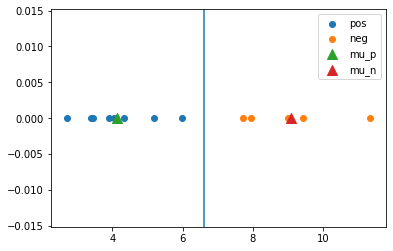

In [28]:
plt.scatter(Xpproj[0], [0]*8, label="pos")
plt.scatter(Xnproj[0], [0]*5, label="neg")
plt.scatter(mu_pproj[0], [0], marker="^", label="mu_p", s=100)
plt.scatter(mu_nproj[0], [0], marker="^", label="mu_n", s=100)
plt.axvline(x=boundary)
plt.legend()

# mybLDA_classify

In [29]:
def mybLDA_classify(X, v):
    global boundary
    Xproj = (v.T @ X)[0]
    preds = np.zeros(Xproj.shape[0])
    preds[Xproj < boundary] = 1
    preds[Xproj >= boundary] = -1
    return preds
    

In [30]:
mybLDA_classify(Xp, lda_projection)

array([1., 1., 1., 1., 1., 1., 1., 1.])

In [31]:
mybLDA_classify(Xn, lda_projection)

array([-1., -1., -1., -1., -1.])

# Classify new data points

In [32]:
X = np.array([[1.3, 2.4, 6.7, 2.2, 3.4, 3.2],
              [8.1, 7.6, 2.1, 1.1, 0.5, 7.4],
              [-1 , 2.0, 3.0, -2 , 0.0, 2.0]])

In [33]:
mybLDA_classify(X, lda_projection)

array([ 1., -1.,  1.,  1.,  1., -1.])